<a href="https://colab.research.google.com/github/nhlong1512/IS403.N21/blob/main/Final/ARIMA_Final05052023_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Đọc dữ liệu

In [22]:
data = pd.read_csv('BTC-USD.csv')

In [23]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2019,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
1,1/2/2019,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5.244857e+09
2,1/3/2019,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4.530215e+09
3,1/4/2019,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4.847965e+09
4,1/5/2019,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5.137610e+09


Dự đoán mô hình tốt nhất bằng AUTO ARIMA

In [24]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm
model = pm.auto_arima(data.Close, start_p=0, 
                      start_q=0,max_p=5, max_q=5, 
                      m=12,start_P=0, seasonal=False,
                      d=0, D=0, trace=True,error_action='ignore',
                      suppress_warnings=True, stepwise=True)

print(model.aic())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36279.536, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=34218.160, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=26107.157, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=26108.642, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=26109.006, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=1.86 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=26110.589, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=26107.301, Time=0.49 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 4.320 seconds
26107.156666437244


Vậy, ta có thể kết luận mô hình ARIMA(p,d,q) phù hợp nhất là ARIMA(1,0,1)

Tiền xử lý dữ liệu

In [26]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

**<h3>Xây dựng mô hình ARIMA</h3>**

In [27]:
train_size = int(len(data) * 0.7)
train, test = data.iloc[:train_size], data.iloc[train_size:]
print(train)

                    Open          High           Low         Close  \
Date                                                                 
2019-01-01   3746.713379   3850.913818   3707.231201   3843.520020   
2019-01-02   3849.216309   3947.981201   3817.409424   3943.409424   
2019-01-03   3931.048584   3935.685059   3826.222900   3836.741211   
2019-01-04   3832.040039   3865.934570   3783.853760   3857.717529   
2019-01-05   3851.973877   3904.903076   3836.900146   3845.194580   
...                  ...           ...           ...           ...   
2021-12-16  48900.464840  49425.574220  47529.878910  47665.425780   
2021-12-17  47653.730470  48004.894530  45618.214840  46202.144530   
2021-12-18  46219.253910  47313.828130  45598.441410  46848.777340   
2021-12-19  46853.867190  48089.664060  46502.953130  46707.015630   
2021-12-20  46707.062500  47401.718750  45579.808590  46880.277340   

               Adj Close        Volume  
Date                                    
2019-01

In [28]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
model=ARIMA(train['Close'],order=(1,0,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1085
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9175.915
Date:                Fri, 05 May 2023   AIC                          18359.831
Time:                        08:47:25   BIC                          18379.788
Sample:                    01-01-2019   HQIC                         18367.386
                         - 12-20-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.17e+04   2.79e+04      0.777      0.437   -3.31e+04    7.65e+04
ar.L1          0.9988      0.002    564.777      0.000       0.995       1.002
ma.L1         -0.0431      0.021     -2.028      0.043      -0.085      -0.001
sigma2      1.295e+06   2.49e+04     51.985      0.000    1.25e+06    1.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3083.67
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              35.32   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1, alpha=0.05)

Biểu đồ Plot

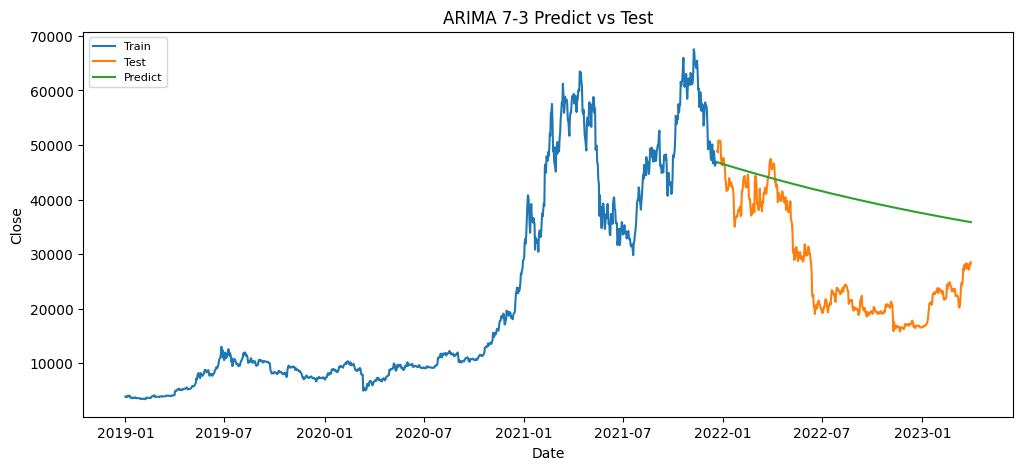

In [30]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(forecast, label='Predict')
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA 7-3 Predict vs Test')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Tính toán mô hình ARIMA 7-3

In [31]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast, test.Close)

<ipython-input-31-aaa5dbf177dd>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-31-aaa5dbf177dd>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-31-aaa5dbf177dd>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-31-aaa5dbf177dd>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:

{'mape': 0.6291231605880453,
 'me': 13167.03636761129,
 'mae': 13398.44571919728,
 'mpe': 0.6243257494105823,
 'rmse': 15163.67505450312,
 'corr': 0.8261522435427171,
 'minmax': 0.33840804317158}

**<h3>ARIMA 8-2</h3>**

In [32]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]
print(train)

                    Open          High           Low         Close  \
Date                                                                 
2019-01-01   3746.713379   3850.913818   3707.231201   3843.520020   
2019-01-02   3849.216309   3947.981201   3817.409424   3943.409424   
2019-01-03   3931.048584   3935.685059   3826.222900   3836.741211   
2019-01-04   3832.040039   3865.934570   3783.853760   3857.717529   
2019-01-05   3851.973877   3904.903076   3836.900146   3845.194580   
...                  ...           ...           ...           ...   
2022-05-20  30311.119140  30664.976560  28793.605470  29200.740230   
2022-05-21  29199.859380  29588.869140  29027.394530  29432.226560   
2022-05-22  29432.472660  30425.861330  29275.183590  30323.722660   
2022-05-23  30309.396480  30590.585940  28975.560550  29098.910160   
2022-05-24  29101.125000  29774.355470  28786.589840  29655.585940   

               Adj Close        Volume  
Date                                    
2019-01

In [33]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
model=ARIMA(train['Close'],order=(1,0,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1240
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10518.311
Date:                Fri, 05 May 2023   AIC                          21044.622
Time:                        08:49:12   BIC                          21065.114
Sample:                    01-01-2019   HQIC                         21052.329
                         - 05-24-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.405e+04    1.2e+04      2.011      0.044     609.680    4.75e+04
ar.L1          0.9978      0.002    646.029      0.000       0.995       1.001
ma.L1         -0.0373      0.021     -1.762      0.078      -0.079       0.004
sigma2      1.363e+06    2.6e+04     52.491      0.000    1.31e+06    1.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2557.79
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              29.25   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1, alpha=0.05)

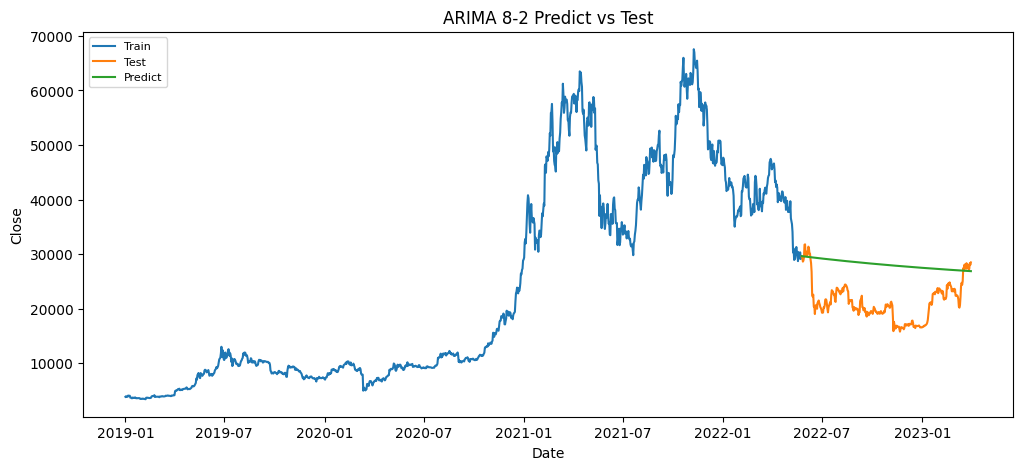

In [35]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(forecast, label='Predict')
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA 8-2 Predict vs Test')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [36]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast, test.Close)

<ipython-input-36-aaa5dbf177dd>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-36-aaa5dbf177dd>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-36-aaa5dbf177dd>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-36-aaa5dbf177dd>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:

{'mape': 0.3595276096743347,
 'me': 6820.357141125019,
 'mae': 6974.420542199389,
 'mpe': 0.3542905078026383,
 'rmse': 7669.819646665085,
 'corr': 0.1773965763225625,
 'minmax': 0.24805498439383367}